In [16]:
import itertools
import copy
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
%matplotlib inline

In [19]:
# Edge List
edgelist = pd.read_csv('https://gist.githubusercontent.com/brooksandrew/e570c38bcc72a8d102422f2af836513b/raw/89c76b2563dbc0e88384719a35cba0dfc04cd522/edgelist_sleeping_giant.csv')

In [20]:
edgelist.head()

,node1,node2,trail,distance,color,estimate
0,rs_end_north,v_rs,rs,0.30,red,0
1,v_rs,b_rs,rs,0.21,red,0
2,b_rs,g_rs,rs,0.11,red,0
3,g_rs,w_rs,rs,0.18,red,0
4,w_rs,o_rs,rs,0.21,red,0


In [21]:
# Node List
nodelist = pd.read_csv('https://gist.githubusercontent.com/brooksandrew/f989e10af17fb4c85b11409fea47895b/raw/a3a8da0fa5b094f1ca9d82e1642b384889ae16e8/nodelist_sleeping_giant.csv')

In [22]:
nodelist.head()

,id,X,Y
0,b_bv,1486,732
1,b_bw,716,1357
2,b_end_east,3164,1111
3,b_end_west,141,1938
4,b_g,1725,771


In [23]:
g = nx.Graph()

In [26]:
for i, elrow in edgelist.iterrows():
    g.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())

In [29]:
# Edge list example
print(elrow[0]) # node1
print(elrow[1]) # node2
print(elrow[2:].to_dict()) # edge attribute dict

o_gy2
y_gy2
{'distance': 0.12, 'estimate': 0, 'color': 'yellowgreen', 'trail': 'gy2'}


In [30]:
for i, nlrow in nodelist.iterrows():
    g.node[nlrow['id']] = nlrow[1:].to_dict()

In [31]:
print(nlrow)

id    y_rt
X      977
Y     1666
Name: 76, dtype: object


In [32]:
# Inspect Graph
# Edges

g.edges(data=True)[0:5]

[('g_w',
  'g_rt',
  {'color': 'green', 'distance': 0.31, 'estimate': 0, 'trail': 'g'}),
 ('g_w',
  'o_w_1',
  {'color': 'gray', 'distance': 0.18, 'estimate': 0, 'trail': 'w'}),
 ('g_w',
  'w_bw',
  {'color': 'gray', 'distance': 0.09, 'estimate': 0, 'trail': 'w'}),
 ('rt_end_south',
  'y_rt',
  {'color': 'red', 'distance': 0.18, 'estimate': 0, 'trail': 'rt'}),
 ('b_rt',
  'tt_rt',
  {'color': 'red', 'distance': 0.04, 'estimate': 1, 'trail': 'rt'})]

In [33]:
# Nodes
g.nodes(data=True)[0:10]

[('g_w', {'X': 700, 'Y': 1582}),
 ('rt_end_south', {'X': 944, 'Y': 1837}),
 ('b_rt', {'X': 835, 'Y': 1309}),
 ('rc_end_south', {'X': 1450, 'Y': 1800}),
 ('rd_end_south_dupe', {'X': 273, 'Y': 1869}),
 ('b_tt_2', {'X': 857, 'Y': 1287}),
 ('v_end_west', {'X': 359, 'Y': 1976}),
 ('g_rc', {'X': 1451, 'Y': 1020}),
 ('v_bv', {'X': 1425, 'Y': 691}),
 ('rh_end_north', {'X': 205, 'Y': 1472})]

In [34]:
# Summary Stats
print('# of edges: {}'.format(g.number_of_edges()))
print('# of nodes: {}'.format(g.number_of_nodes()))

# of edges: 123
# of nodes: 77


# Visualize

Manipulate Colors and Layout

In [36]:
# Define node positions data structure (dict) for plotting
node_positions = {node[0]: (node[1]['X'], -node[1]['Y']) for node in g.nodes(data=True)}

# Preview of node_positions with a bit of hack (there is no head/slice method for dictionaries)
dict(list(node_positions.items())[0:5])

{'b_rt': (835, -1309),
 'g_w': (700, -1582),
 'rc_end_south': (1450, -1800),
 'rt_end_south': (944, -1837),
 'y_rs': (1805, -1246)}

In [37]:
# Define data structure (list) of edge colors for plotting
edge_colors = [e[2]['color'] for e in g.edges(data=True)]

# Preview first 10
edge_colors[0:10]

['green', 'gray', 'gray', 'red', 'red', 'blue', 'red', 'blue', 'red', 'black']

# Plot

C:\Users\toshiba\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\toshiba\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\toshiba\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\toshiba\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be re

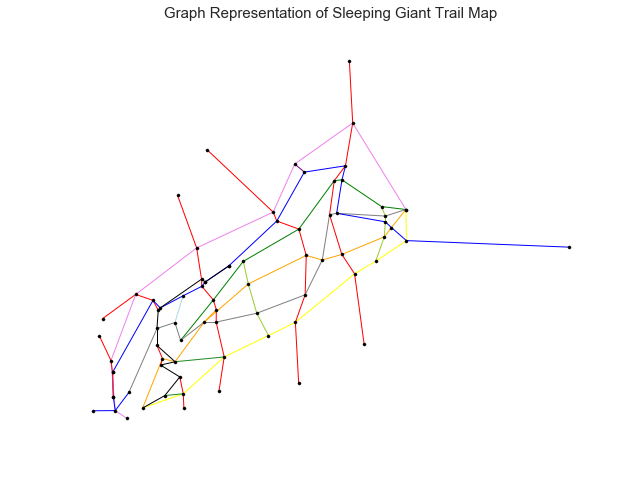

In [39]:
plt.figure(figsize=(8,6))
nx.draw(g, pos=node_positions, edge_color=edge_colors, node_size=10, node_color='black')

plt.title('Graph Representation of Sleeping Giant Trail Map', size=15)

plt.show()